## The economic index dataset has 2 independent features and 1 dependent feature 

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

In [3]:
df=pd.read_csv(r"datasets\economic_index.csv",index_col=False)

In [4]:
df.head()
##here the independent features are unemployement rate and interest rate , index price is the target feautre 

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [5]:
df.drop(columns=['Unnamed: 0','year','month'],inplace=True)

In [6]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

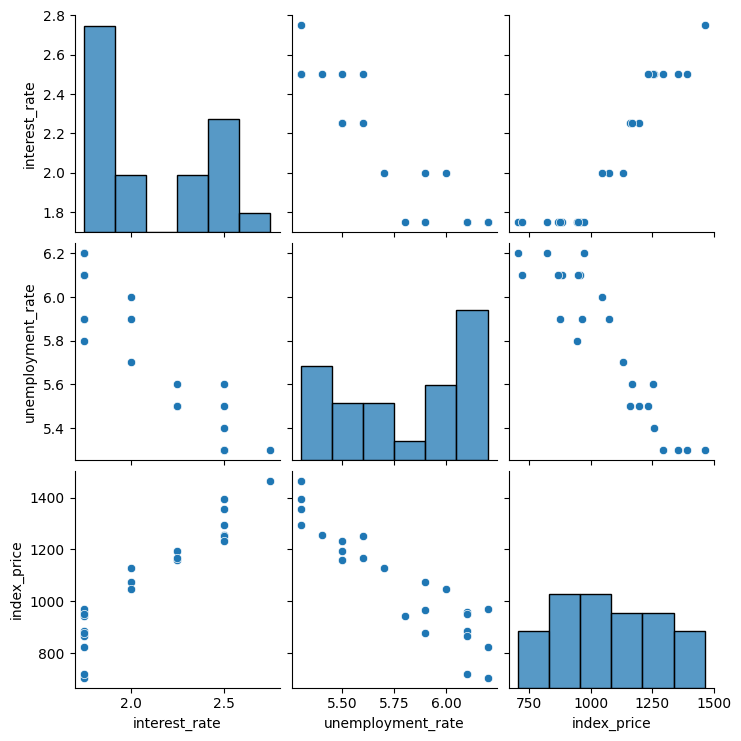

In [7]:
sns.pairplot(df)
##either pairplot or correlation df.corr() and the see the heatmap sns.heatmap(df.cors())

In [8]:
df.corr()
## interest and index is positively correlated and unemployement rate and index_price is negatively correlated

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


In [9]:
y=df["index_price"]
X=df[['interest_rate','unemployment_rate']]
# or we can use df.iloc[::-1] all columns except last one    
# y= df.iloc[:-1]

In [10]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train,y_test = train_test_split(X,y,test_size=0.25 ,random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)

X_test=scaler.transform(X_test)

In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
y_pred=model.predict(X_test)
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

<Axes: xlabel='index_price', ylabel='interest_rate'>

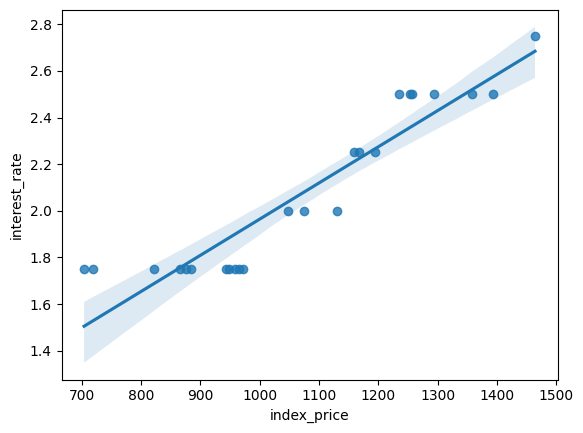

In [14]:
sns.regplot(x=df['index_price'],y=df['interest_rate'],data=df)
#regplot is a function in Seaborn that creates a scatter plot with a regression line. 
# It’s used to visualize the relationship between two variables and see how well a linear model fits the data.

In [15]:
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(model,X_train,y_train,scoring='neg_mean_squared_error',
                                cv=3)
# Perform 3-fold cross-validation on the training data
# using negative mean squared error as the evaluation metric.
# Returns an array of scores (one per fold), where more positive values indicate better performance.
# Split the data into 3 equal parts.
# Train on 2 parts, validate on 1 part.
# Repeat 3 times so every part is used once for validation.

In [16]:
np.mean(validation_score)

np.float64(-5914.828180162386)

### Assumption (ways by which we can say that our model is doing good)

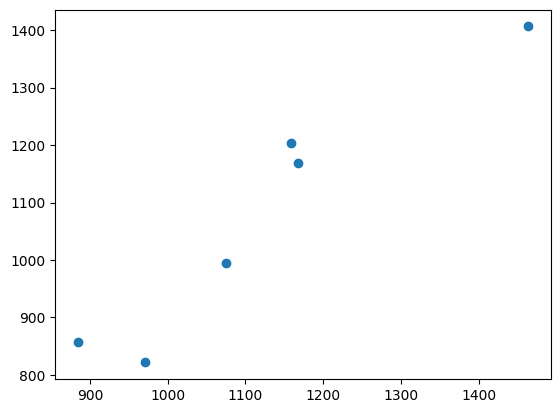

In [17]:
plt.scatter(y_test,y_pred)
#Points should lie close to the 45° diagonal line (where prediction = actual).

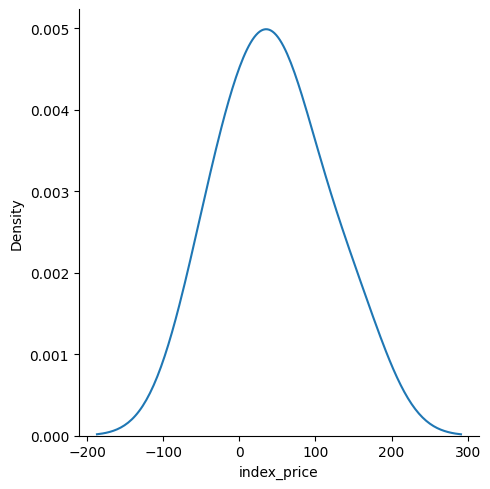

In [18]:
residuals=y_test-y_pred
sns.displot(residuals,kind='kde')
# A good regression model should not consistently overpredict or underpredict.
# If residuals average to 0, then on average, predictions are unbiased.

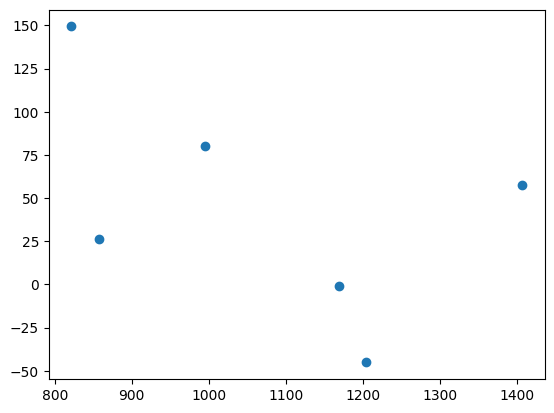

In [19]:
plt.scatter(y_pred,residuals)
# Significance:

# Random scatter → good model fit (errors are random noise).

# Patterns (e.g., curved shape) → model may be missing non-linear relationships.

# Funnel shape (variance grows with prediction) → heteroscedasticity (violates linear regression assumptions).